In [61]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [73]:
weather_data = pd.read_csv("data/weather_year.csv")
weather_data.shape

(366, 23)

In [75]:
weather_data.columns = ["date", "max_temp", "mean_temp", "min_temp", "max_dew",    "mean_dew", "min_dew", "max_humidity", "mean_humidity",
    "min_humidity", "max_pressure", "mean_pressure",
    "min_pressure", "max_visibilty", "mean_visibility",
    "min_visibility", "max_wind", "mean_wind", "min_wind",
    "precipitation", "cloud_cover", "events", "wind_dir"]

In [41]:
print(weather_data.head())
print(weather_data.tail())

        date  max_temp  mean_temp  min_temp  max_dew  mean_dew  min_dew  \
0  2012-3-10        56         40        24       24        20       16   
1  2012-3-11        67         49        30       43        31       24   
2  2012-3-12        71         62        53       59        55       43   
3  2012-3-13        76         63        50       57        53       47   
4  2012-3-14        80         62        44       58        52       43   

   max_humidity  mean_humidity  min_humidity   ...     max_visibilty  \
0            74             50            26   ...                10   
1            78             53            28   ...                10   
2            90             76            61   ...                10   
3            93             66            38   ...                10   
4            93             68            42   ...                10   

   mean_visibility  min_visibility  max_wind  mean_wind  min_wind  \
0               10              10        13   

In [42]:
weather_data.dtypes

date                object
max_temp             int64
mean_temp            int64
min_temp             int64
max_dew              int64
mean_dew             int64
min_dew              int64
max_humidity         int64
mean_humidity        int64
min_humidity         int64
max_pressure       float64
mean_pressure      float64
min_pressure       float64
max_visibilty        int64
mean_visibility      int64
min_visibility       int64
max_wind             int64
mean_wind            int64
min_wind           float64
precipitation       object
cloud_cover          int64
events              object
wind_dir             int64
dtype: object

In [43]:
weather_data.precipitation.unique()

array(['0.00', 'T', '0.03', '0.04', '0.14', '0.86', '0.06', '0.01',
       '0.51', '0.69', '1.45', '0.38', '0.19', '0.15', '0.49', '0.29',
       '0.09', '0.90', '0.02', '0.07', '0.13', '0.10', '0.36', '0.27',
       '0.16', '0.26', '0.31', '0.05', '0.32', '1.85', '0.53', '2.00',
       '0.92', '1.10', '0.17', '1.13', '0.63', '0.50', '0.71', '0.73',
       '1.52', '0.47', '0.39', '0.18', '0.77', '0.08', '0.33', '0.44',
       '0.48', '0.20', '0.12', '0.82', '1.16', '1.73', '0.40', '0.99',
       '0.30', '1.17'], dtype=object)

In [44]:
weather_data.loc[weather_data.precipitation == "T", "precipitation"] = 1e-6

In [46]:
weather_data.precipitation.astype(float)

0      0.000000
1      0.000001
2      0.030000
3      0.000000
4      0.000000
5      0.040000
6      0.000001
7      0.000001
8      0.000001
9      0.000000
10     0.000000
11     0.000000
12     0.140000
13     0.860000
14     0.060000
15     0.000000
16     0.000000
17     0.000000
18     0.000001
19     0.000001
20     0.010000
21     0.000000
22     0.510000
23     0.010000
24     0.000000
25     0.010000
26     0.690000
27     0.000000
28     0.000000
29     0.000001
         ...   
336    0.000000
337    0.270000
338    0.000000
339    0.000000
340    0.000000
341    0.000000
342    0.000001
343    0.000000
344    0.000000
345    0.390000
346    0.100000
347    0.000000
348    0.300000
349    0.030000
350    0.000000
351    0.000000
352    0.000000
353    1.170000
354    0.050000
355    0.010000
356    0.030000
357    0.000001
358    0.000001
359    0.000001
360    0.260000
361    0.040000
362    0.000000
363    0.000000
364    0.000001
365    0.000000
Name: precipitation, Len

In [49]:
weather_data.describe().T

,count,mean,std,min,25%,50%,75%,max
max_temp,366.0,66.803279,20.361247,16.00,51.00,69.00,84.0000,106.00
mean_temp,366.0,55.683060,18.436506,11.00,41.00,59.00,70.7500,89.00
min_temp,366.0,44.101093,17.301141,1.00,30.00,47.00,57.7500,77.00
max_dew,366.0,49.549180,16.397178,0.00,36.00,54.50,62.0000,77.00
mean_dew,366.0,44.057377,16.829996,-3.00,30.00,48.00,57.0000,72.00
min_dew,366.0,37.980874,17.479449,-5.00,24.00,41.00,51.0000,71.00
max_humidity,366.0,90.027322,9.108438,54.00,85.00,93.00,96.0000,100.00
mean_humidity,366.0,67.860656,9.945591,37.00,61.25,68.00,74.0000,95.00
min_humidity,366.0,45.193989,15.360261,15.00,35.00,42.00,54.0000,90.00
max_pressure,366.0,30.108907,0.172189,29.64,29.99,30.10,30.2100,30.60


In [50]:
def string_to_time(date_string):
    return datetime.strptime(date_string, "%Y-%m-%d")

In [51]:
weather_data.date = weather_data.date.apply(string_to_time)

In [52]:
weather_data.index = weather_data.date

In [53]:
weather_data = weather_data.drop("date", axis=1)

In [54]:
print(weather_data.loc[datetime(2012, 8, 19)]) # or weather.loc["2012-08-19"]

max_temp              82
mean_temp             67
min_temp              51
max_dew               56
mean_dew              50
min_dew               42
max_humidity          96
mean_humidity         62
min_humidity          28
max_pressure       29.95
mean_pressure      29.92
min_pressure       29.89
max_visibilty         10
mean_visibility       10
min_visibility        10
max_wind              14
mean_wind              3
min_wind              21
precipitation       0.00
cloud_cover            1
events               NaN
wind_dir               1
Name: 2012-08-19 00:00:00, dtype: object


In [56]:
weather_data.groupby("events").mean()

,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,mean_pressure,min_pressure,max_visibilty,mean_visibility,min_visibility,max_wind,mean_wind,min_wind,cloud_cover,wind_dir
events,,,,,,,,,,,,,,,,,,,,
Fog,67.153846,54.153846,40.846154,50.384615,44.846154,38.307692,99.384615,74.769231,48.923077,30.134615,30.080000,30.009231,10.000000,5.846154,0.000000,12.692308,3.692308,17.307692,1.923077,165.384615
Fog-Rain,58.636364,50.909091,42.727273,52.090909,46.818182,39.363636,99.636364,82.909091,64.727273,30.003636,29.890000,29.805455,9.909091,5.000000,0.000000,16.363636,5.909091,22.272727,5.909091,224.363636
Fog-Rain-Snow,43.333333,34.000000,24.000000,39.333333,29.000000,19.000000,94.666667,74.333333,53.666667,30.223333,30.023333,29.856667,10.000000,5.333333,0.000000,23.333333,9.333333,35.000000,6.333333,212.666667
Fog-Rain-Snow-Thunderstorm,57.000000,43.000000,28.000000,50.000000,36.000000,25.000000,92.000000,79.000000,66.000000,29.750000,29.440000,29.230000,10.000000,5.000000,0.000000,35.000000,19.000000,54.000000,8.000000,219.000000
Fog-Rain-Thunderstorm,80.125000,69.500000,58.750000,66.750000,62.500000,58.000000,99.125000,79.750000,60.125000,30.012500,29.937500,29.828750,10.000000,5.625000,0.000000,21.500000,4.625000,31.750000,4.500000,189.250000
Fog-Snow,32.200000,27.400000,21.800000,27.000000,22.600000,14.600000,88.400000,76.000000,63.400000,30.198000,29.924000,29.762000,10.000000,4.200000,0.000000,23.400000,12.200000,34.400000,7.400000,224.200000
Fog-Thunderstorm,78.000000,62.000000,46.000000,60.000000,54.000000,46.000000,100.000000,78.000000,56.000000,30.150000,30.110000,30.040000,10.000000,5.000000,0.000000,12.000000,5.000000,17.000000,3.000000,162.000000
Rain,64.797101,55.739130,46.188406,53.782609,46.971014,39.347826,90.826087,71.652174,52.159420,30.069420,29.954783,29.854493,10.000000,8.565217,4.782609,18.231884,7.594203,25.478261,4.782609,202.869565
Rain-Snow,50.666667,39.333333,27.333333,44.000000,30.333333,19.000000,92.666667,79.666667,66.333333,29.966667,29.750000,29.556667,10.000000,8.000000,2.000000,28.000000,12.666667,41.000000,8.000000,279.000000


In [30]:
weather_data.head()

,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,...,max_visibilty,mean_visibility,min_visibility,max_wind,mean_wind,min_wind,precipitation,cloud_cover,events,wind_dir
date,,,,,,,,,,,,,,,,,,,,,
2012-03-10,56,40,24,24,20,16,74,50,26,30.53,...,10,10,10,13,6,17.0,0.00,0,NaN,138
2012-03-11,67,49,30,43,31,24,78,53,28,30.37,...,10,10,10,22,7,32.0,NaN,1,Rain,163
2012-03-12,71,62,53,59,55,43,90,76,61,30.13,...,10,10,6,24,14,36.0,0.03,6,Rain,190
2012-03-13,76,63,50,57,53,47,93,66,38,30.12,...,10,10,4,16,5,24.0,0.00,0,NaN,242
2012-03-14,80,62,44,58,52,43,93,68,42,30.15,...,10,10,10,16,6,22.0,0.00,0,NaN,202


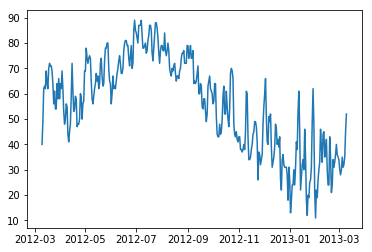

In [62]:
plt.plot(weather_data.mean_temp)

In [76]:
# weather_with_events = weather_data.dropna(subset=["events"])
weather_data.events = weather_data.events.fillna("") # Better

In [77]:
# for (cover, events), group_data in weather_data.groupby(["cloud_cover", "events"]):
#     print ("Cover: {0}, Events: {1}, Count: {2}"
#         .format(cover, events, len(group_data)))
weather_data.groupby(["cloud_cover", "events"]).count()

date  max_temp  mean_temp  min_temp  \
cloud_cover events                                                            
0                                         99        99         99        99   
            Fog                            2         2          2         2   
            Rain                           2         2          2         2   
            Thunderstorm                   1         1          1         1   
1                                         35        35         35        35   
            Fog                            5         5          5         5   
            Fog-Rain                       1         1          1         1   
            Rain                           4         4          4         4   
            Rain-Thunderstorm              2         2          2         2   
            Thunderstorm                   6         6          6         6   
2                                         20        20         20        20   
            Fog                            1         1          1         1   
            Rain                           5         5          5         5   
            Rain-Thunderstorm              4         4          4         4   
            Snow                           1         1          1         1   
            Thunderstorm                   2         2          2         2   
3                                         12        12         12        12   
            Fog                            2         2          2         2   
            Fog-Rain-Thunderstorm          3         3          3         3   
            Fog-Thunderstorm               1         1          1         1   
            Rain                           9         9          9         9   
            Rain-Thunderstorm              4         4          4         4   
            Snow                           1         1          1         1   
4                                         16        16         16        16   
            Fog                            3         3          3         3   
            Fog-Rain                       2         2          2         2   
            Fog-Rain-Thunderstorm          2         2          2         2   
            Rain                          10        10         10        10   
            Rain-Thunderstorm              6         6          6         6   
            Snow                           1         1          1         1   
5                                          9         9          9         9   
            Fog-Rain                       1         1          1         1   
            Fog-Rain-Snow                  1         1          1         1   
            Rain                          13        13         13        13   
            Rain-Thunderstorm              3         3          3         3   
            Snow                           2         2          2         2   
6                                          3         3          3         3   
            Fog-Rain                       2         2          2         2   
            Fog-Rain-Snow                  1         1          1         1   
            Fog-Rain-Thunderstorm          2         2          2         2   
            Rain                           9         9          9         9   
            Rain-Thunderstorm              4         4          4         4   
            Snow                           1         1          1         1   
7                                          5         5          5         5   
            Fog-Rain                       1         1          1         1   
            Fog-Rain-Thunderstorm          1         1          1         1   
            Fog-Snow                       3         3          3         3   
            Rain                           6         6          6         6   
            Rain-Thunderstorm              3         3          3         3   
           